[View in Colaboratory](https://colab.research.google.com/github/saadkattan/python-visualization/blob/master/images.ipynb)

##Working with images

### Addtional knowaledge : 
- [`np.sum`:](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html)
- [Colab:loading and saving data from external sources](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7Z2jcRKwUHqV)
- [`np.ndarray.flatten`:](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html)
- [`np.interp`:](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.interp.html)
- 

### Code list:: 
Summary of all instructions used in this file for personal reference use.
```python
from google.colab import drive
drive.mount('/content/drive')
img = plt.imread("/content/drive/My Drive/Colab Notebooks/python-visualization/Astronaut-EVA.jpg")
print(img.shape)
plt.imshow(img)
plt.axis('off')
intensity = img.sum(axis=2)
plt.imshow(intensity, cmap='gray')
plt.imshow(cut, extent = (-1,1,-1,1),aspect='auto')
int_min, int_max = intensity.min(), intensity.max()
print("The smallest & largest pixel intensities are %d & %d." % (int_min, int_max))
rescaled_intensity = 256*(intensity - int_min) / (int_max - int_min)
print("The rescaled smallest & largest pixel intensities are %.2f & %.2f." % 
      (rescaled_intensity.min(), rescaled_intensity.max()))
pixels = Unequalized.flatten()
plt.xlim((0,255))
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
plt.twinx()
cdf1 = plt.hist(new_pixels, bins=64, range=(0,256), cumulative=True, normed=True, color='blue', alpha=0.4)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)
new_image = new_pixels.reshape(Unequalized.shape)
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

           
```

In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# To mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(3072, 3072, 3)


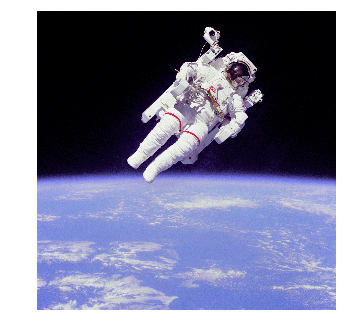

In [3]:

# Load the image into an array: img
img = plt.imread("/content/drive/My Drive/Colab Notebooks/python-visualization/Astronaut-EVA.jpg")
# Print the shape of the image
print(img.shape)

# Display the image
plt.imshow(img)
# Hide the axes
plt.axis('off')
plt.show()


(3072, 3072)


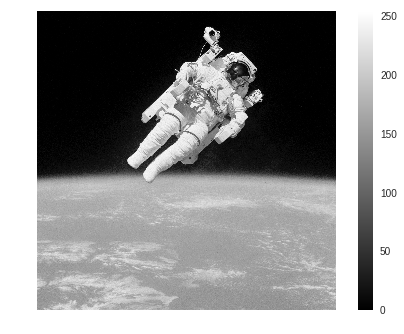

In [4]:
# Compute the sum of the red, green and blue channels: intensity
intensity = img.mean(axis=2) #WE HAVE A QUESION HERE
# Print the shape of the intensity
print(intensity.shape)
# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')
# Add a colorbar
plt.colorbar()
# Hide the axes and show the figure
plt.axis('off')
plt.show()

(1000, 3072)


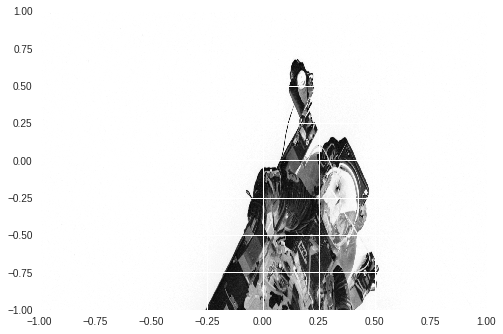

In [18]:
#slicing, aspect and extent
cut = intensity[0:1000,:]
plt.imshow(cut, extent = (-1,1,-1,1),aspect='auto')
#plt.imshow(cut)
print(cut.shape)
plt.show()

#### Note:
- by default, the x- and y-axes are labeled by the number of samples in each direction.
- **`apsect`** is The ratio of the displayed width to height
- range used to label the x- and y-axes is known as the image **`extent`**
- The default **`aspect`** value of **`auto`** keeps the pixels square and the extents are automatically computed from the shape of the array if not specified otherwise.



The smallest & largest pixel intensities are 0 & 254.
The rescaled smallest & largest pixel intensities are 0.00 & 256.00.


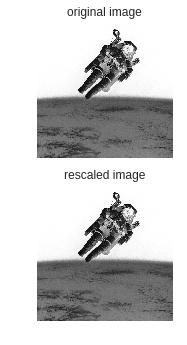

In [36]:

# Extract minimum and maximum values from the image: pmin, pmax
int_min, int_max = intensity.min(), intensity.max()
print("The smallest & largest pixel intensities are %d & %d." % (int_min, int_max))
# Rescale the pixels: rescaled_image
rescaled_intensity = 256*(intensity - int_min) / (int_max - int_min)
print("The rescaled smallest & largest pixel intensities are %.2f & %.2f." % 
      (rescaled_intensity.min(), rescaled_intensity.max()))
# Display the original image in the top subplot
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(intensity)
# Display the rescaled intensity in the bottom subplot
plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_intensity)
plt.show()

In [0]:
Unequalized = plt.imread("/content/drive/My Drive/Colab Notebooks/python-visualization/Unequalized.jpg")

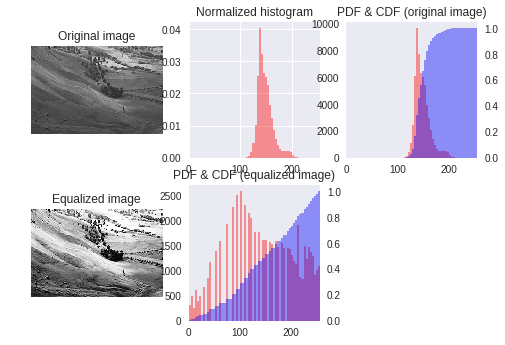

In [36]:
# Display image in top subplot using color map 'gray'
plt.subplot(2,3,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(Unequalized, cmap="gray")
# Flatten the image into 1 dimension: pixels
pixels = Unequalized.flatten()
# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,3,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range= (0,256),normed=True , color = 'red', alpha = 0.4)

plt.subplot(2,3,3)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
plt.grid('off')
# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
# Display a cumulative histogram of the pixels
cdf, bins, patches = plt.hist(pixels, bins=64, range=(0,256),normed=True, cumulative=True, color='blue', alpha=0.4)      
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')

plt.subplot(2,3,4)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)
# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(Unequalized.shape)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap = 'gray')

# Generate a histogram of the new pixels
plt.subplot(2,3,5)
pdf1 = plt.hist(new_pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
plt.grid('off')
plt.twinx()
plt.xlim((0,256))
plt.grid('off')
# Add title
plt.title('PDF & CDF (equalized image)')
# Generate a cumulative histogram of the new pixels
cdf1 = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
# Display the plot
plt.show()


- The histogram option `cumulative=True` permits viewing the CDF instead of the PDF.
- The command `plt.twinx()` allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.
- A histogram of a continuous random variable is sometimes called a Probability Distribution Function (or PDF). The area under a PDF (a definite integral) is called a Cumulative Distribution Function (or CDF). The CDF quantifies the probability of observing certain pixel intensities.
- [Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization) is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line



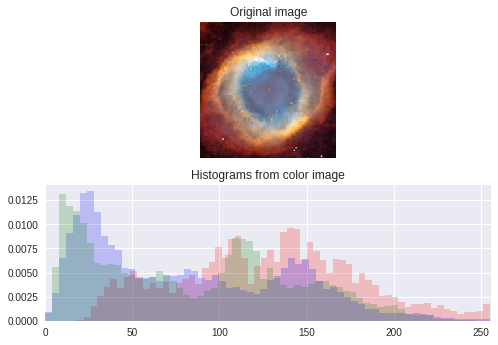

In [39]:
# Load the image into an array: image
image = plt.imread('/content/drive/My Drive/Colab Notebooks/python-visualization/colorimage.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green',alpha=0.2)

# Display the plot
plt.show()


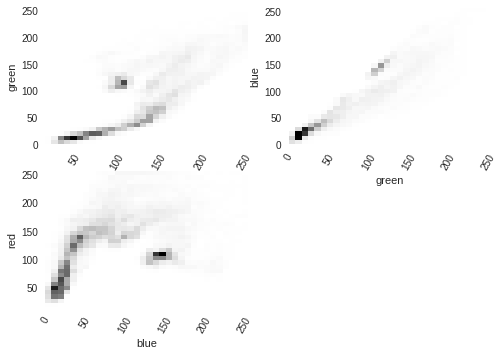

In [40]:
# Extracting bivariate histograms from a color image
# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels,blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.show()
